## 3. サポートベクタマシン(SVM)
SVMの目的は、**マージン**の最大化である。  
マージンとは、決定境界と、この境界に最も近い訓練データの間の距離として定義される。  
この決定境界に最も近い訓練データは**サポートベクトル**と呼ばれる。  
ロジスティック回帰に比べ外れ値の影響を受けにくい。
  
ここで、決定境界に沿った正と負の超平面を見ていく。  
これらの超平面は、次のように表せる。
$$
w_0+\boldsymbol{w}^T\boldsymbol{x}_{pos}=1\\
w_0+\boldsymbol{w}^T\boldsymbol{x}_{neg}=-1
$$

この2つの方程式の差をとる。
$$
\boldsymbol{w}^T(\boldsymbol{x}_{pos}-\boldsymbol{x}_{neg})=2
$$

この式の両辺をベクトルの長さ$|\boldsymbol{w}|$で割る。
$$
\frac{\boldsymbol{w}^T(\boldsymbol{x}_{pos}-\boldsymbol{x}_{neg})}{|\boldsymbol{w}|}=\frac{2}{|\boldsymbol{w}|}
$$

この式の左辺は、正の超平面と負の超平面の距離(すなわちマージン)として解釈できる。  
SVMの目的関数を最大化する問題は、$\frac{2}{|\boldsymbol{w}|}$を最大化する問題に帰着する。  
実際には、逆数をとって2乗した$\frac{1}{2}|\boldsymbol{w}|^2$を最小化するほうが簡単である。  
ただし、これにはデータ点が正しく分類されているという制約がある。  
$$
w_0+\boldsymbol{w}^T\boldsymbol{x}^{(i)}\geq1\ (y^{(i)}=1)\\
w_0+\boldsymbol{w}^T\boldsymbol{x}^{(i)}\leq-1\ (y^{(i)}=-1)\\
i=1\cdots N
$$
簡潔に書くと、
$$
y^{(i)}(w_0+\boldsymbol{w}^T\boldsymbol{x}^{(i)})\geq1
$$
となる。  
  
#### ソフトマージン分類
**スラック変数**$\xi$を導入することで、適切なペナルティを科した上で、  
誤分類が存在する状態のまま最適化問題を収束させることが可能となった。  
$$
w_0+\boldsymbol{w}^T\boldsymbol{x}^{(i)}\geq1-\xi^{(i)}\ (y^{(i)}=1)\\
w_0+\boldsymbol{w}^T\boldsymbol{x}^{(i)}\leq-1+\xi^{(i)}\ (y^{(i)}=-1)\\
i=1\cdots N
$$

最小化すべき対象は次のようになる。
$$
\frac{1}{2}|\boldsymbol{w}|^2+C\biggl(\sum_{i}\xi^{(i)} \biggl)
$$

Cの値が大きい場合は、誤分類のペナルティが大きく、Cの値が小さいときはペナルティが小さい。  
これにより、Cを使ってマージンの幅を制御できる。

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data[:,[2,3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [2]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier):
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cuan']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.3)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                    alpha=0.8,
                    label=cl, 
                    cmap=cmap,
                    edgecolor='black')

In [23]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC 

svc = LinearSVC(C=1.0) # Cはペナルティ
#svc = SVC(kernel='linear', C=1.0)

svc.fit(X_train_std, y_train)

LinearSVC()

In [24]:
print(f'y :{y_test[:5]}')
print(f'predict :{svc.predict(X_test_std[:5])}')

y :[2 2 0 1 2]
predict :[2 2 0 1 1]


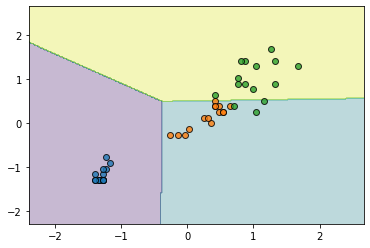

In [25]:
plot_decision_regions(X_test_std, y_test, svc)

#### カーネルSVM
線形分離不能なデータの処理をする方法に、**カーネル法**がある。  
射影関数$\phi$を使ってそれらの組み合わせを高次元へ射影し、線形分離できるようにする。  
例えば、
$$
\phi(x_1,x_2)=(z_1,z_2,z_3)=(x_1,x_2,x_1^2+x_2^2)
$$

のような変換である。  
ただし、新しい特徴量を生成する計算コストが非常に高いという問題がある。  
ここで、**カーネルトリック**と呼ばれる手法があり、**カーネル関数**を定義して、データ間の距離を直接計算する。
$$
K(\boldsymbol{x}^{(i)}, \boldsymbol{x}^{(j)})=\phi(\boldsymbol{x}^{(i)})^T\phi(\boldsymbol{x}^{(j)})
$$

最もよく使われるカーネルの1つに**動径基底関数カーネル(ガウスカーネル)**がある。
$$
K(\boldsymbol{x}^{(i)}, \boldsymbol{x}^{(j)})=\exp\biggl(-\frac{|\boldsymbol{x}^{(i)}-\boldsymbol{x}^{(j)}|^2}{2\sigma^2} \biggr)
$$

これは、次のように簡略化される。
$$
K(\boldsymbol{x}^{(i)}, \boldsymbol{x}^{(j)})=\exp\bigl(-\gamma|\boldsymbol{x}^{(i)}-\boldsymbol{x}^{(j)}|^2 \bigr)
$$

ここで、$\gamma=\frac{1}{2\sigma^2}$はハイパーパラメータである。

In [26]:
np.random.seed(0)

features = np.random.randn(200, 2)

target_xor = np.logical_xor(features[:,0]>0, features[:,1]>0)
target = np.where(target_xor, 0, 1)

svc = SVC(kernel="rbf", # ガウスカーネル
          gamma=1, # カットオフ(限界値条件): 大きくするほど決定境界が狭くなる
          C=1, # ペナルティ
          probability=True # 確率も出力させる
         )

model = svc.fit(features, target)

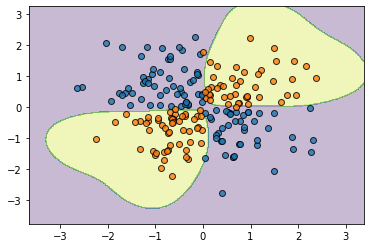

In [27]:
plot_decision_regions(features, target, svc)

In [28]:
print(f'y :{y_test[:5]}')
print(f'predict :{svc.predict(X_test_std[:5])}')
print('probability')
print(svc.predict_proba(X_test_std[:5]))

y :[2 2 0 1 2]
predict :[1 1 1 1 1]
probability
[[2.53258450e-09 9.99999997e-01]
 [3.88326094e-08 9.99999961e-01]
 [5.40254098e-07 9.99999460e-01]
 [1.21000645e-01 8.78999355e-01]
 [9.24761083e-03 9.90752389e-01]]


#### SVMによる回帰(SVR)
SVRでは**ε-不感損失関数**という損失関数を使用し、  
境界付近のデータ点の誤差は0となるようにする。  
この-ε～+εの領域を**εチューブ**と呼ぶ。  
  
SVM同様に非線形回帰も可能である。

In [30]:
from sklearn.datasets import load_boston

boston = load_boston()
features = boston.data
target = boston.target
names = boston.feature_names

df = pd.DataFrame(features, columns=names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


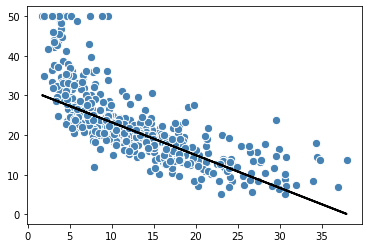

In [41]:
from sklearn.svm import SVR

X = df[['LSTAT']]

svr = SVR(C=1.0, kernel='linear', epsilon=0.1)
svr.fit(X, target)

y_pred = svr.predict(X)

plt.scatter(X, target, c='steelblue', edgecolor='white', s=70)
plt.plot(X, y_pred, color='black', lw=2)
plt.show()

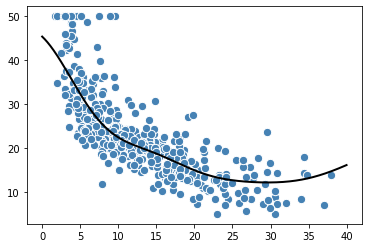

In [60]:
svr = SVR(C=10.0, kernel='rbf', epsilon=5, gamma=0.01)
svr.fit(X, target)

x = np.arange(0, 40, 0.02).reshape(-1,1)

y_pred = svr.predict(x)

plt.scatter(X, target, c='steelblue', edgecolor='white', s=70)
plt.plot(x, y_pred, color='black', lw=2)
plt.show()